## exercise 3.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#3.2
#2-D dart board
nx,ny = 101,101
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
X,Y = np.meshgrid(x,y)
R2 = np.power(X,2) + np.power(Y,2)
ind = R2 < 200**2



In [4]:
#simulate by uniform random point
count_in = 0
count_out = 0
for i in range(10000):
    x = np.random.uniform(-1,1,1)
    y = np.random.uniform(-1,1,1)
    if x**2 + y**2 <=1:
        count_in += 1
    else:
        count_out += 1
print('simulation result:', (count_in/10000)*4)
print('accurate result:', np.pi)

simulation result: 3.1156
accurate result: 3.141592653589793


simulation result: 3.1352
accurate result: 3.141592653589793


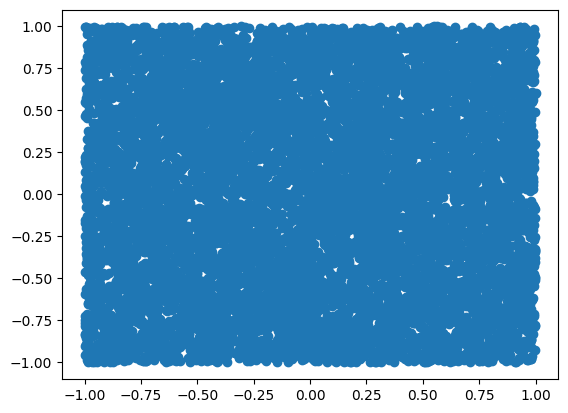

In [5]:
#simulate by uniform random point
count_in = 0
count_out = 0
points_x = np.zeros(10000)
points_y = np.zeros(10000)
for i in range(10000):
    x = np.random.uniform(-1,1,1)
    points_x[i] = x
    y = np.random.uniform(-1,1,1)
    points_y[i] = y
    if x**2 + y**2 <=1:
        count_in += 1
    else:
        count_out += 1
print('simulation result:', (count_in/10000)*4)
print('accurate result:', np.pi)
plt.scatter(points_x,points_y)

In [405]:
n = 10000
N = np.arange(2,10,1)
frac_simu = np.zeros(len(N))

for k in range(len(N)):
    count = 0
    shape = [N[k],n]
    tensor = np.empty(shape)
    for i in range(N[k]):
        tensor[i] = np.random.uniform(-1,1,n)
    dist2 = np.sum(tensor**2, axis = 0)
    sphere = sum(r<=1 for r in dist2)
    frac_simu[k] = sphere/n

frac_simu

array([0.7803, 0.5295, 0.3051, 0.1602, 0.0756, 0.0354, 0.017 , 0.0064])

Text(0, 0.5, 'Fraction')

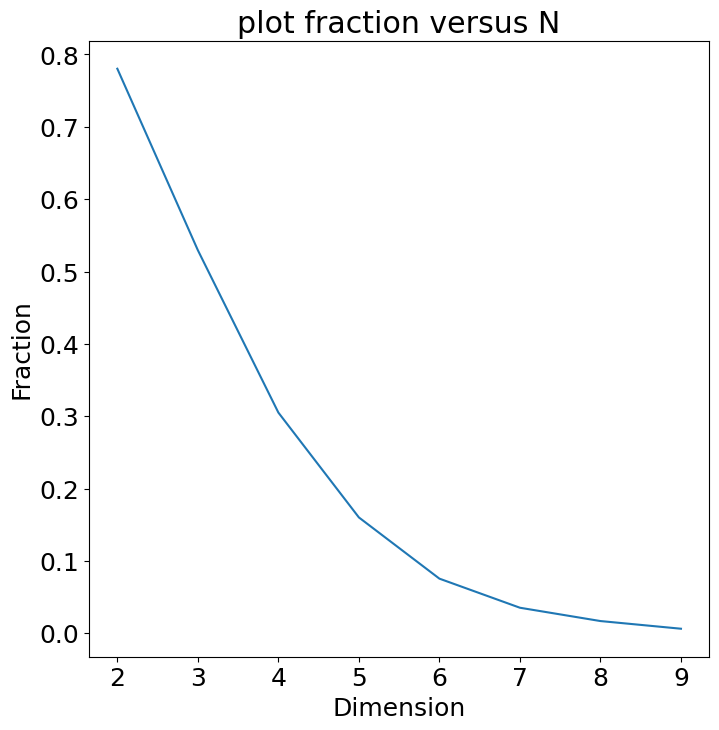

In [409]:
#plot fraction versus N
plt.plot(N, frac_simu)
plt.title('plot fraction versus N')
plt.xlabel('Dimension')
plt.ylabel('Fraction')

Fraction decreased when dimension N increase.

## exercise 3.3

(array([ 73,  87, 108, 160, 464]),)
(array([ 73,  87, 108, 160, 464]),)


/Users/zhaoheng/Downloads/databook_python-master/Heng_Zhao_Homework_Data_Driven/cosamp.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


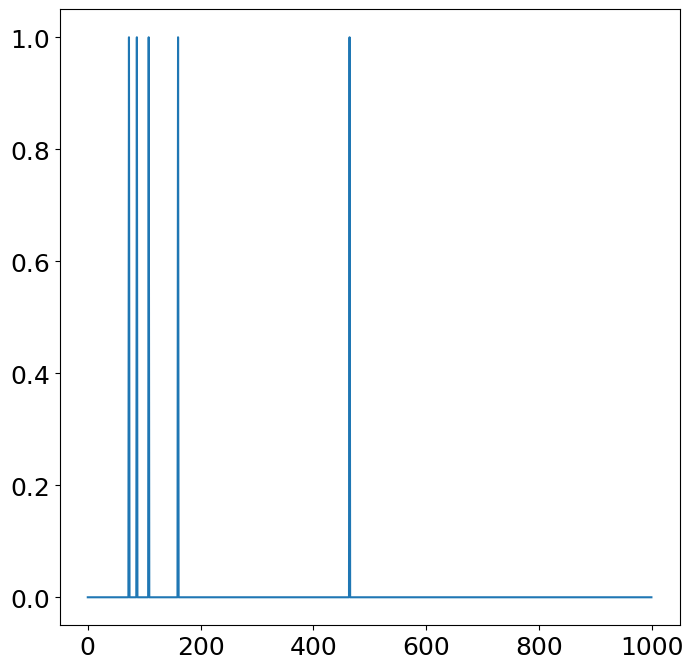

In [329]:
#3.3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import scipy.io
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
from cosamp import cosamp
plt.rcParams['figure.figsize'] = [8, 8]
#in the case n = 1000, K = 5, p = 100
p = 100
n = 1000
C = np.random.randn(p,n)
Psi = dct(np.identity(n))
s = np.zeros(n)
K = 5
idx = np.random.randint(0,999,K)
for i in idx:
    s[i] = 1
y = C @ Psi @ s
CPhi = C @ Psi
s_hat = cosamp(CPhi, y, K)
print(np.nonzero(s))#index of nonzero element
print(np.nonzero(s_hat))#index of nonzero element of estimated sparse vector
plt.plot(s_hat)

### 3.3 (a)

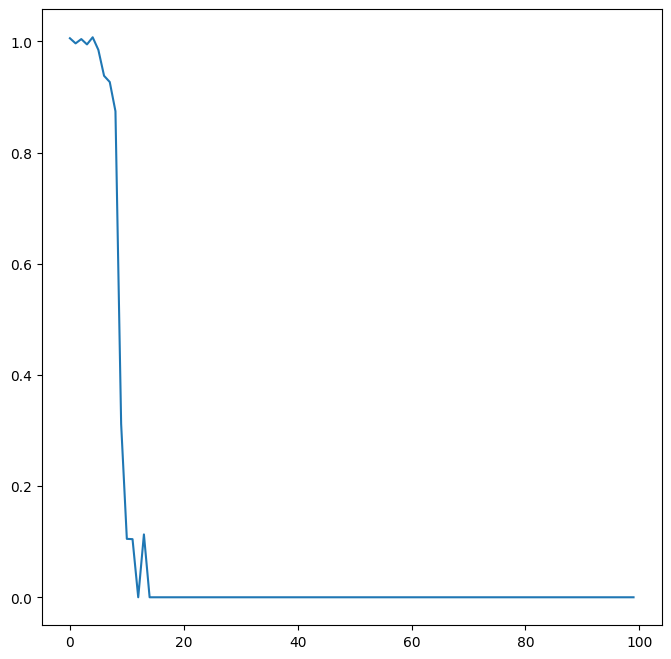

In [204]:
#3.3 (a)
#for each p from 1 to 100, plot average relative error of ||s_hat - s||/||s||
def CS_err(n, p, K):
    avg_relerr = []
    for i in range(10):
        C = np.random.randn(p,n)
        Psi = dct(np.identity(n))
        s = np.zeros(n)
        idxs = np.random.randint(0,n-1,K)
        for idx in idxs:
            s[i] = 1
        y = C @ Psi @ s
        CPhi = C @ Psi
        s_hat = cosamp(CPhi, y, K)
        err = np.linalg.norm(s_hat-s, ord = 2)/np.linalg.norm(s, ord = 2)
        avg_relerr.append(err)
    return np.mean(avg_relerr)


def CS_err_avg(n,K):
    error = []
    p_set = np.arange(1,101)
    for p in p_set:
        error.append(CS_err(n, p, K))
    return error

n = 1000
K = 5
rel_err = CS_err_avg(n,K)
plt.plot(rel_err)

**relative error decreased when p increase**

### 3.3(b)

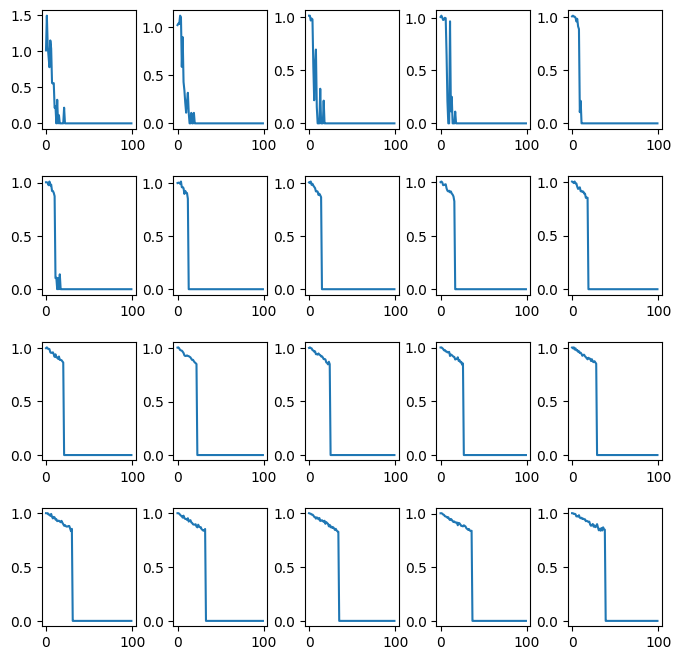

In [205]:
#plot
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 21):
    ax = fig.add_subplot(4, 5, i)
    ax.plot(CS_err_avg(n, i))

**Sparsity K increased from 1 to 20, the higher p needed to achieve small error.**

### 3.3(c)

/Users/zhaoheng/Downloads/databook_python-master/Heng_Zhao_Homework_Data_Driven/cosamp.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


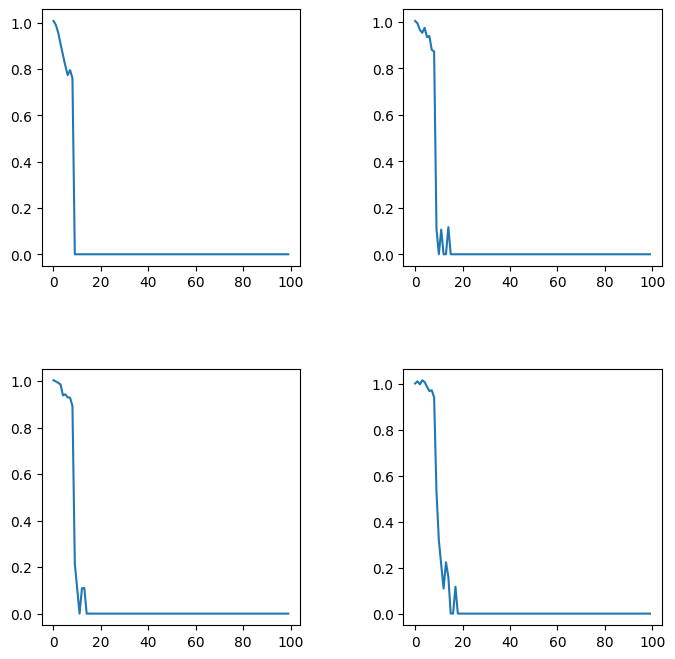

In [208]:
#3.3(c)repeat for K = 5, varing signal size n = 100, 500, 1000, 5000
N = [100, 500, 1000, 5000]
K = 5
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(N)):
    ax = fig.add_subplot(2, 2, i+1)
    ax.plot(CS_err_avg(N[i], K))

## Exercise 3.6

In [255]:
#3.6
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
import scipy.misc
import skimage
from skimage.transform import resize
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('/Users/zhaoheng/Downloads/databook_python-master/DATA/VORTALL.mat'))
X=mat_contents['VORTALL']


In [ ]:
n_vortall = np.shape(X)[1]
X_img = np.reshape(X, (449,199,n_vortall))
X_small = resize(X_img, (22,9,151))#Downsmple to (22,9)
X_s = np.reshape(X_small, (198,n_vortall))
X_small_train = X_small[:,:,0:99]
X_small_test = X_small[:,:,100:150]
fname_full = '/Users/zhaoheng/Downloads/databook_python-master/Heng_Zhao_Homework_Data_Driven/fig_full/'
fname_small = '/Users/zhaoheng/Downloads/databook_python-master/Heng_Zhao_Homework_Data_Driven/fig_small/'
for i in range(np.shape(X_img)[2]):
    skimage.io.imsave(fname_full + str(i) + '.png', X_img[:,:,i])
for i in range(np.shape(X_small)[2]):
    skimage.io.imsave(fname_small + str(i) + '.png', X_small[:,:,i])


In [280]:
np.shape(X_small)

(22, 9, 151)

In [275]:
import imageio
#create movie
def createMovie(X):
    plt.rcParams['figure.figsize'] = [8, 8]
    filenames = []
    for i in range(151):
        plotFlow(X[:,i])
        filename = './fig_full/'+str(i)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
    with imageio.get_writer('vort_full.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.v2.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

In [276]:
#plot flow
def plotFlow(X):    
    ## Plot Mode 2
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(X,(449,199))))
    V2 = V2.T

    # normalize values... not symmetric
    minval = np.min(V2)
    maxval = np.max(V2)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

    plt.scatter(49,99,5000,color='k') # draw cylinder

    #plt.show()

In [288]:
#create movie for downsampled data
def createMovie_small(X):
    plt.rcParams['figure.figsize'] = [8, 8]
    filenames = []
    for i in range(151):
        plotFlow_small(X[:,i])
        filename = './fig_small/'+str(i)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
    with imageio.get_writer('vort_small.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.v2.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

In [287]:
#plot flow for downsampled data
def plotFlow_small(X):    
    ## Plot Mode 2
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(X,(22,9))))
    V2 = V2.T

    # normalize values... not symmetric
    minval = np.min(V2)
    maxval = np.max(V2)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

    plt.scatter(2,4,5000,color='k') # draw cylinder


In [278]:
from IPython.display import Image
createMovie(X)
Image(url='vort_full.gif')  


In [292]:
createMovie_small(X_s)
Image(url='vort_small.gif')  

In [384]:
#pick one column of full flow and add noise
X0 = X[:,0]
X0_noise = X0 + np.random.randn(*np.shape(X[:,1]))
X0_noise_ds = resize(np.reshape(X0_noise, (449,199)),(22,9))

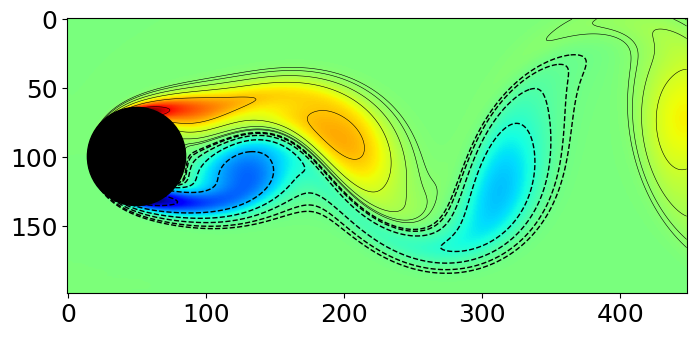

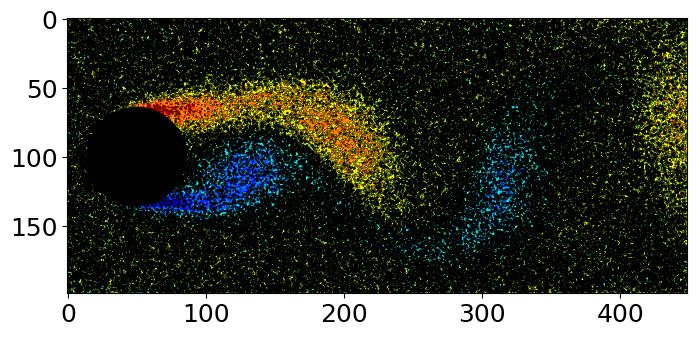

In [385]:
plt.figure()
plotFlow(X0)
plt.figure()
plotFlow(X0_noise)

In [386]:
## L1 Search, Testclean
Theta = X_s
## Renormalize Columns of Theta
M = X_s.shape[1]
normTheta = np.zeros(M)
for k in range(M):
    normTheta[k] = np.linalg.norm(Theta[:,k])
    Theta[:,k] = Theta[:,k]/normTheta[k]

y1 = np.reshape(X0_noise_ds, (198,1))
eps = 10

# L1 Minimum norm solution s_L1
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'ineq', 'fun': lambda x:  eps - np.linalg.norm(Theta @ x - y1,2)})
x0 = np.linalg.pinv(Theta) @ y1 # initialize with L2 solution
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s1 = res.x

/var/folders/j9/qm8sr1l91sq4kgqv2y5k23280000gn/T/ipykernel_89933/2164535477.py:19: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)


**plot sparse s**

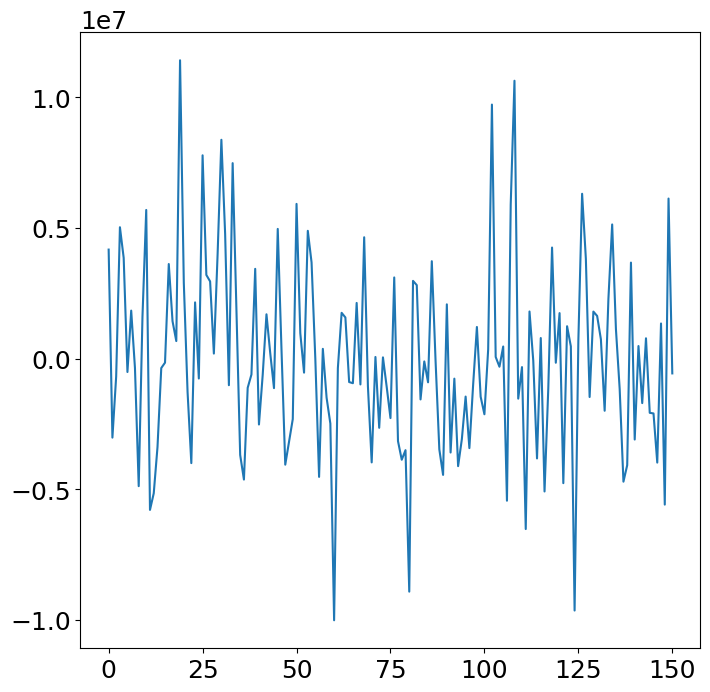

In [387]:
plt.plot(s1)

In [388]:
binErr = np.zeros(151)
for k in range(151):
    L = range(k,k+1)
    binErr[k] = np.linalg.norm(X0_noise-X[:,L] @ (s[L]/normTheta[L]))/np.linalg.norm(X0_noise)
binErr = binErr.tolist()
min_idx = binErr.index(min(binErr))

**plot error**

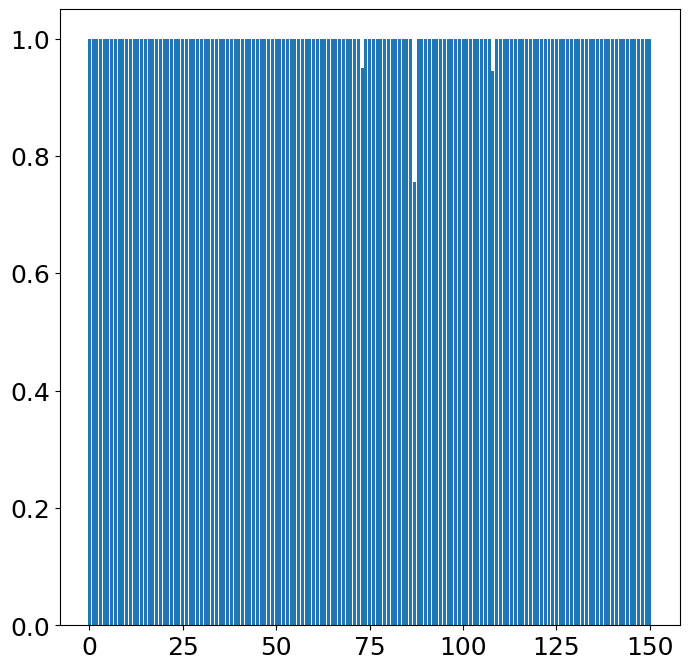

In [389]:
plt.figure()
plt.bar(range(151),binErr)
plt.show()


**plot original image and denoised image**

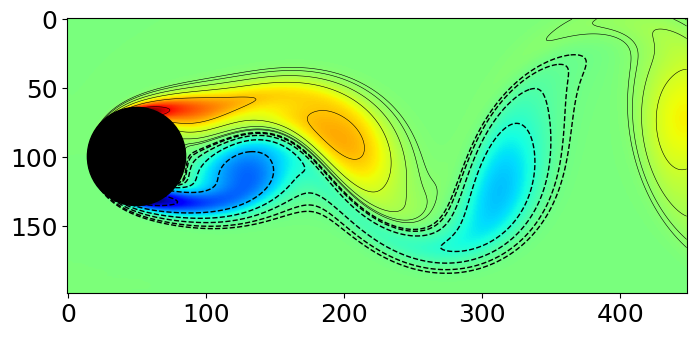

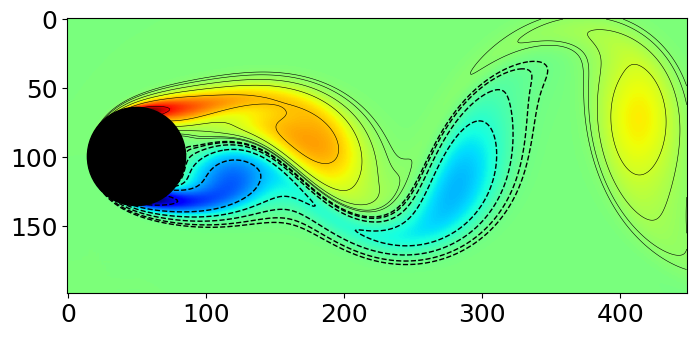

In [390]:
plt.figure()
plotFlow(X0)#noised image
plt.figure()
plotFlow(np.reshape(X[:,min_idx], (449,199)))#denoised image

**for different noise level mu = 0.1, 0.5, 1.0, 1.5, 2.0. plot denoised images**

/var/folders/j9/qm8sr1l91sq4kgqv2y5k23280000gn/T/ipykernel_89933/3888821531.py:9: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)


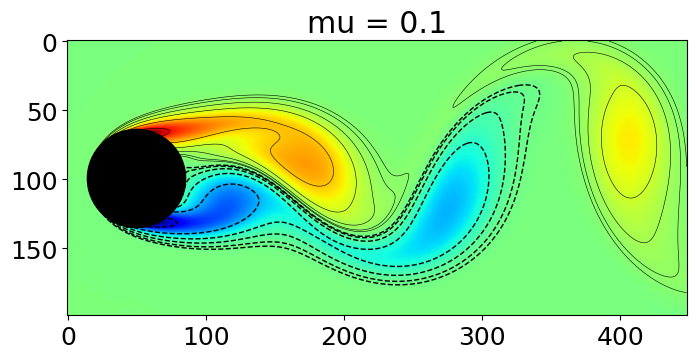

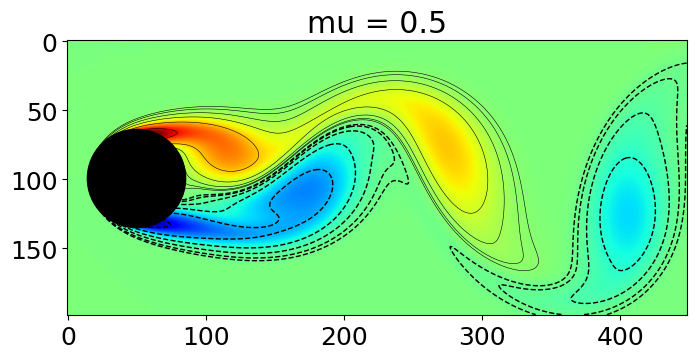

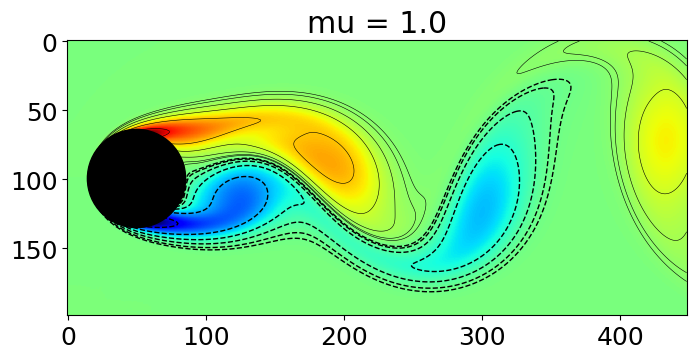

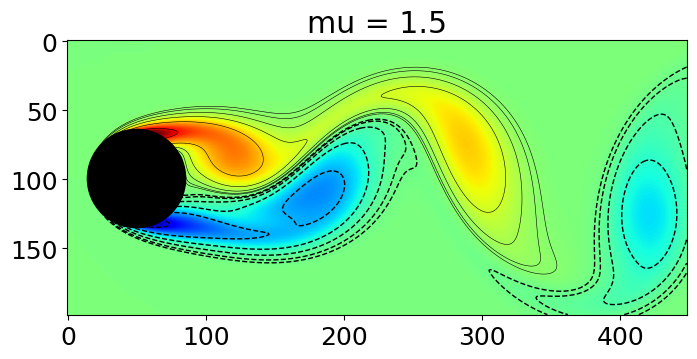

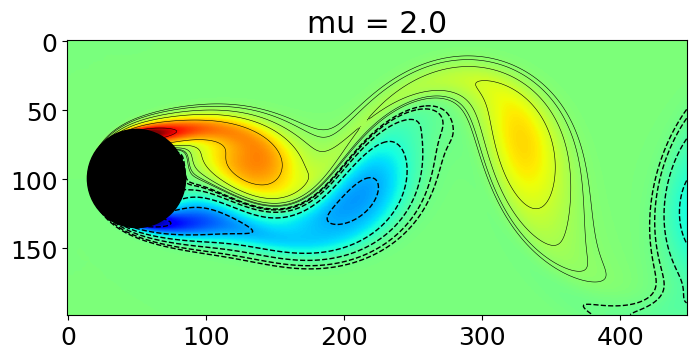

In [396]:
mu = [0.1, 0.5, 1.0, 1.5, 2.0]
for u in mu:
    x0 = X[:,0]
    x_noise = x0 + u*np.random.randn(*np.shape(x0))
    x_noise_ds = resize(np.reshape(x_noise, (449,199)),(22,9))
    y0 = np.reshape(x_noise_ds, (198,1))
    constr = ({'type': 'ineq', 'fun': lambda x:  eps - np.linalg.norm(Theta @ x - y1,2)})
    x0 = np.linalg.pinv(Theta) @ y0 # initialize with L2 solution
    res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
    s1 = res.x
    binErr = np.zeros(151)
    for k in range(151):
        L = range(k,k+1)
        binErr[k] = np.linalg.norm(x_noise-X[:,L] @ (s1[L]/normTheta[L]))/np.linalg.norm(x_noise)
    binErr = binErr.tolist()
    min_idx = binErr.index(min(binErr))
    x_denoise = np.reshape(X[:,min_idx], (449,199))
    plt.figure()
    plotFlow(x_denoise)
    plt.title('mu = '+ str(u))
